In [45]:
### Imports

import random
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph, END, START
from IPython.display import Image, display


In [46]:
class AgentState(TypedDict):
  name: str
  numbers: List[int]
  counter: int

In [47]:
def greeting_node(state: AgentState) -> AgentState:
  """
    This node returns a greeting message.
  """
  state["name"] = f"Hi there, {state['name']}!"
  state["counter"] = 0
  return state

In [48]:
def random_node(state: AgentState) -> AgentState:
  """
    This node returns a random number.
  """
  print("Random Node")
  state["numbers"].append(random.randint(0, 100))
  state["counter"] += 1
  return state

In [49]:
def shouldContinue(state: AgentState):
    print("Should Continue")
    if state["counter"] < 5:
        return "loop"
    return "exit"

In [50]:
graph=StateGraph(AgentState)
graph.add_node("greeting_node", greeting_node)
graph.add_node("random_node", random_node)

graph.add_edge("greeting_node", "random_node")

graph.add_conditional_edges(
  "random_node",
  shouldContinue,
  {
    "loop": "random_node",
    "exit": END
  }
)
graph.set_entry_point("greeting_node")

app = graph.compile()


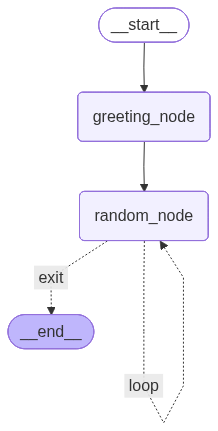

In [51]:
display(Image(app.get_graph().draw_mermaid_png()))

In [52]:
app.invoke({"name": "Mk", "numbers": [], "counter": -1})

Random Node
Should Continue
Random Node
Should Continue
Random Node
Should Continue
Random Node
Should Continue
Random Node
Should Continue


{'name': 'Hi there, Mk!', 'numbers': [53, 38, 19, 18, 3], 'counter': 5}